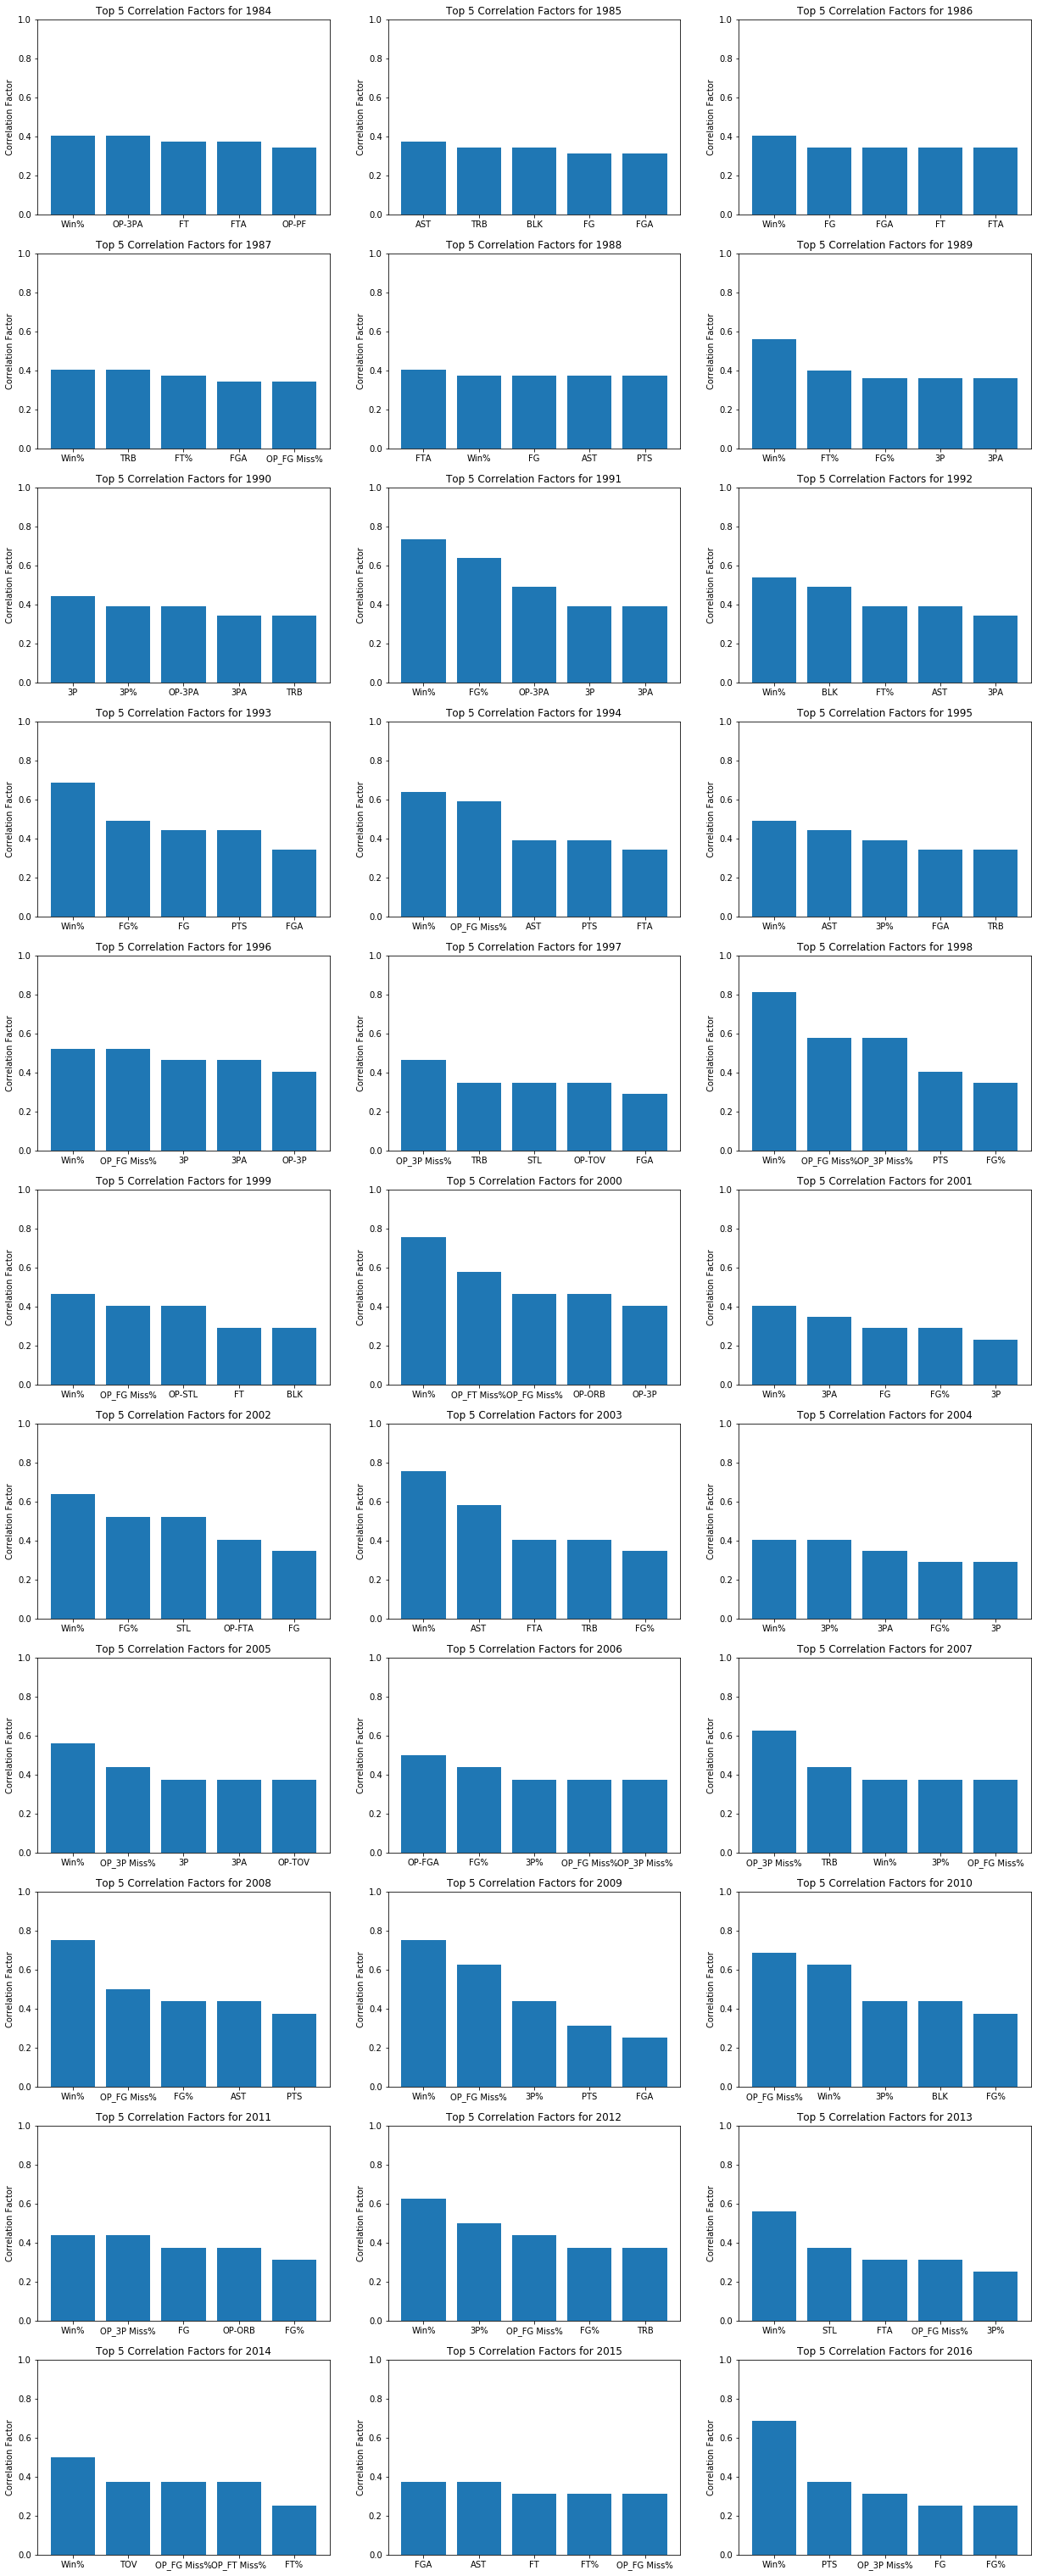

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
import operator
%matplotlib inline

plt.figure(figsize=(21, 55))

#Pulls data from website for each team and each year. Then creates an array with all of the data.
Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','KCK','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAS','SDC','SEA','UTA','WSB']
n = 0
Year = '1984'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
    
#Array data is then transferred to a dataframe. Certain percentage stats are then calculated and input into the dataframe. Data is then normalized by the league averages.
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']

#Playoff data is inserted. Who made the playoffs and who didn't.
Playoff_List = [True,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,False,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)

#The top 16 in each stat is collected and ran against the teams that made the playoffs. If all teams that are in the top 16 of the stat are the teams that made the playoffs. The correlation factor would be 100%.
z = 0
x = list(DF.columns[5:])
factors = {}
WinPer_Year = {}
OP_FG_MissPer_Year = {}
Ast_Year = {}
FGPer_Year = {}
Three_Year = {}
ThreePer_Year = {}
OP_3P_MissPer_Year = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (7/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1984 = DF

#Graphs are made of the top 5 correlation factors for each season.
plt.subplot(11, 3, 1)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','KCK','LAC','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAS','SEA','UTA','WSB']
n = 0
Year = '1985'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,True,True,True,True,True,False,True,False,False,False,True,True,True,False,True,True,True,True,False,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (7/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1985 = DF
plt.subplot(11, 3, 2)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1986'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,False,True,True,True,False,True,False,False,True,True,True,False,True,False,True,True,True,False,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (7/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1986 = DF
plt.subplot(11, 3, 3)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1987'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,False,True,True,True,True,True,True,False,True,True,False,False,True,False,True,False,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (7/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1987 = DF
plt.subplot(11, 3, 4)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1988'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,True,True,True,True,False,True,False,False,True,True,False,True,False,False,True,False,True,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (7/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1988 = DF
plt.subplot(11, 3, 5)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','NJN','NYK','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1989'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,True,False,True,True,True,True,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (9/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1989 = DF
plt.subplot(11, 3, 6)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1990'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,True,True,True,True,True,False,True,True,False,True,False,True,False,False,True,False,True,True,True,False,True,False,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (11/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1990 = DF
plt.subplot(11, 3, 7)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1991'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,False,False,True,True,True,True,False,True,False,True,False,False,True,False,True,True,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (11/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1991 = DF
plt.subplot(11, 3, 8)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1992'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,True,True,False,False,True,True,False,True,True,True,True,False,False,True,True,False,False,True,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (11/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1992 = DF
plt.subplot(11, 3, 9)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1993'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,True,True,False,False,False,False,True,True,True,True,False,False,False,True,True,False,False,True,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (11/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
plt.subplot(11, 3, 10)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1994'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,False,True,True,False,True,False,True,True,True,False,False,True,False,False,True,True,True,False,True,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (11/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1994 = DF
plt.subplot(11, 3, 11)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1995'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,True,True,False,True,False,False,True,True,False,True,False,False,False,False,True,True,False,True,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (11/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1995 = DF
plt.subplot(11, 3, 12)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WSB']
n = 0
Year = '1996'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,False,True,True,False,False,True,False,True,True,False,True,True,False,False,False,True,True,False,True,True,True,True,True,False,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1996 = DF
plt.subplot(11, 3, 13)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WSB']
n = 0
Year = '1997'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,True,True,False,False,False,True,False,True,False,True,True,True,False,True,False,True,True,False,True,True,False,False,True,False,True,False,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1997 = DF
plt.subplot(11, 3, 14)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '1998'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,True,True,True,False,False,False,False,True,True,False,True,True,False,True,True,True,False,False,True,True,False,True,True,False,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1998 = DF
plt.subplot(11, 3, 15)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '1999'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,False,False,False,False,False,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_1999 = DF
plt.subplot(11, 3, 16)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '2000'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,True,False,False,False,False,True,False,False,True,False,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2000 = DF
plt.subplot(11, 3, 17)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))





Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '2001'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,True,False,False,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2001 = DF
plt.subplot(11, 3, 18)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2002'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,True,False,False,True,False,True,False,False,True,False,True,False,False,False,True,True,False,True,True,False,True,True,True,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2002 = DF
plt.subplot(11, 3, 19)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2003'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,False,True,False,True,False,False,True,False,True,False,False,True,True,True,True,False,True,True,True,True,True,True,False,False,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2003 = DF
plt.subplot(11, 3, 20)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2004'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,False,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True,False,False,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = ((16-z)/16) * (13/14)
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2004 = DF
plt.subplot(11, 3, 21)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2005'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,True,False,True,True,True,False,True,True,False,False,True,True,False,False,True,False,False,False,True,True,False,True,True,True,False,False,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2005 = DF
plt.subplot(11, 3, 22)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOK','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2006'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,False,True,True,True,True,True,False,False,True,True,True,True,True,True,False,True,False,False,False,False,True,False,True,True,False,False,False,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2006 = DF
plt.subplot(11, 3, 23)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOK','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2007'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,False,True,True,True,True,True,True,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,True,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2007 = DF
plt.subplot(11, 3, 24)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2008'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2008 = DF
plt.subplot(11, 3, 25)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2009'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,True,True,True,True,False,True,False,False,True,False,True,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2009 = DF
plt.subplot(11, 3, 26)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2010'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,True,True,True,True,False,False,False,False,False,True,False,True,True,False,False,False,False,True,True,False,True,True,False,True,False,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2010 = DF
plt.subplot(11, 3, 27)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2011'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,True,True,False,False,False,True,False,True,True,True,False,False,False,True,True,True,True,True,False,True,False,True,False,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2011 = DF
plt.subplot(11, 3, 28)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2012'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,True,True,False,False,False,True,True,True,True,True,False,False,False,False,True,True,True,True,False,False,False,True,False,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2012 = DF
plt.subplot(11, 3, 29)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','BRK','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOH','OKC','NYK','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2013'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,False,True,False,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2013 = DF
plt.subplot(11, 3, 30)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','BRK','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2014'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,True,True,True,False,True,False,False,True,True,True,True,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,False,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2014 = DF
plt.subplot(11, 3, 31)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2015'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,False,True,True,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True,False,True,True,False,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2015 = DF
plt.subplot(11, 3, 32)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2016'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,True,True,False,True,True,True,True,True,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2016 = DF
plt.subplot(11, 3, 33)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



plt.show()

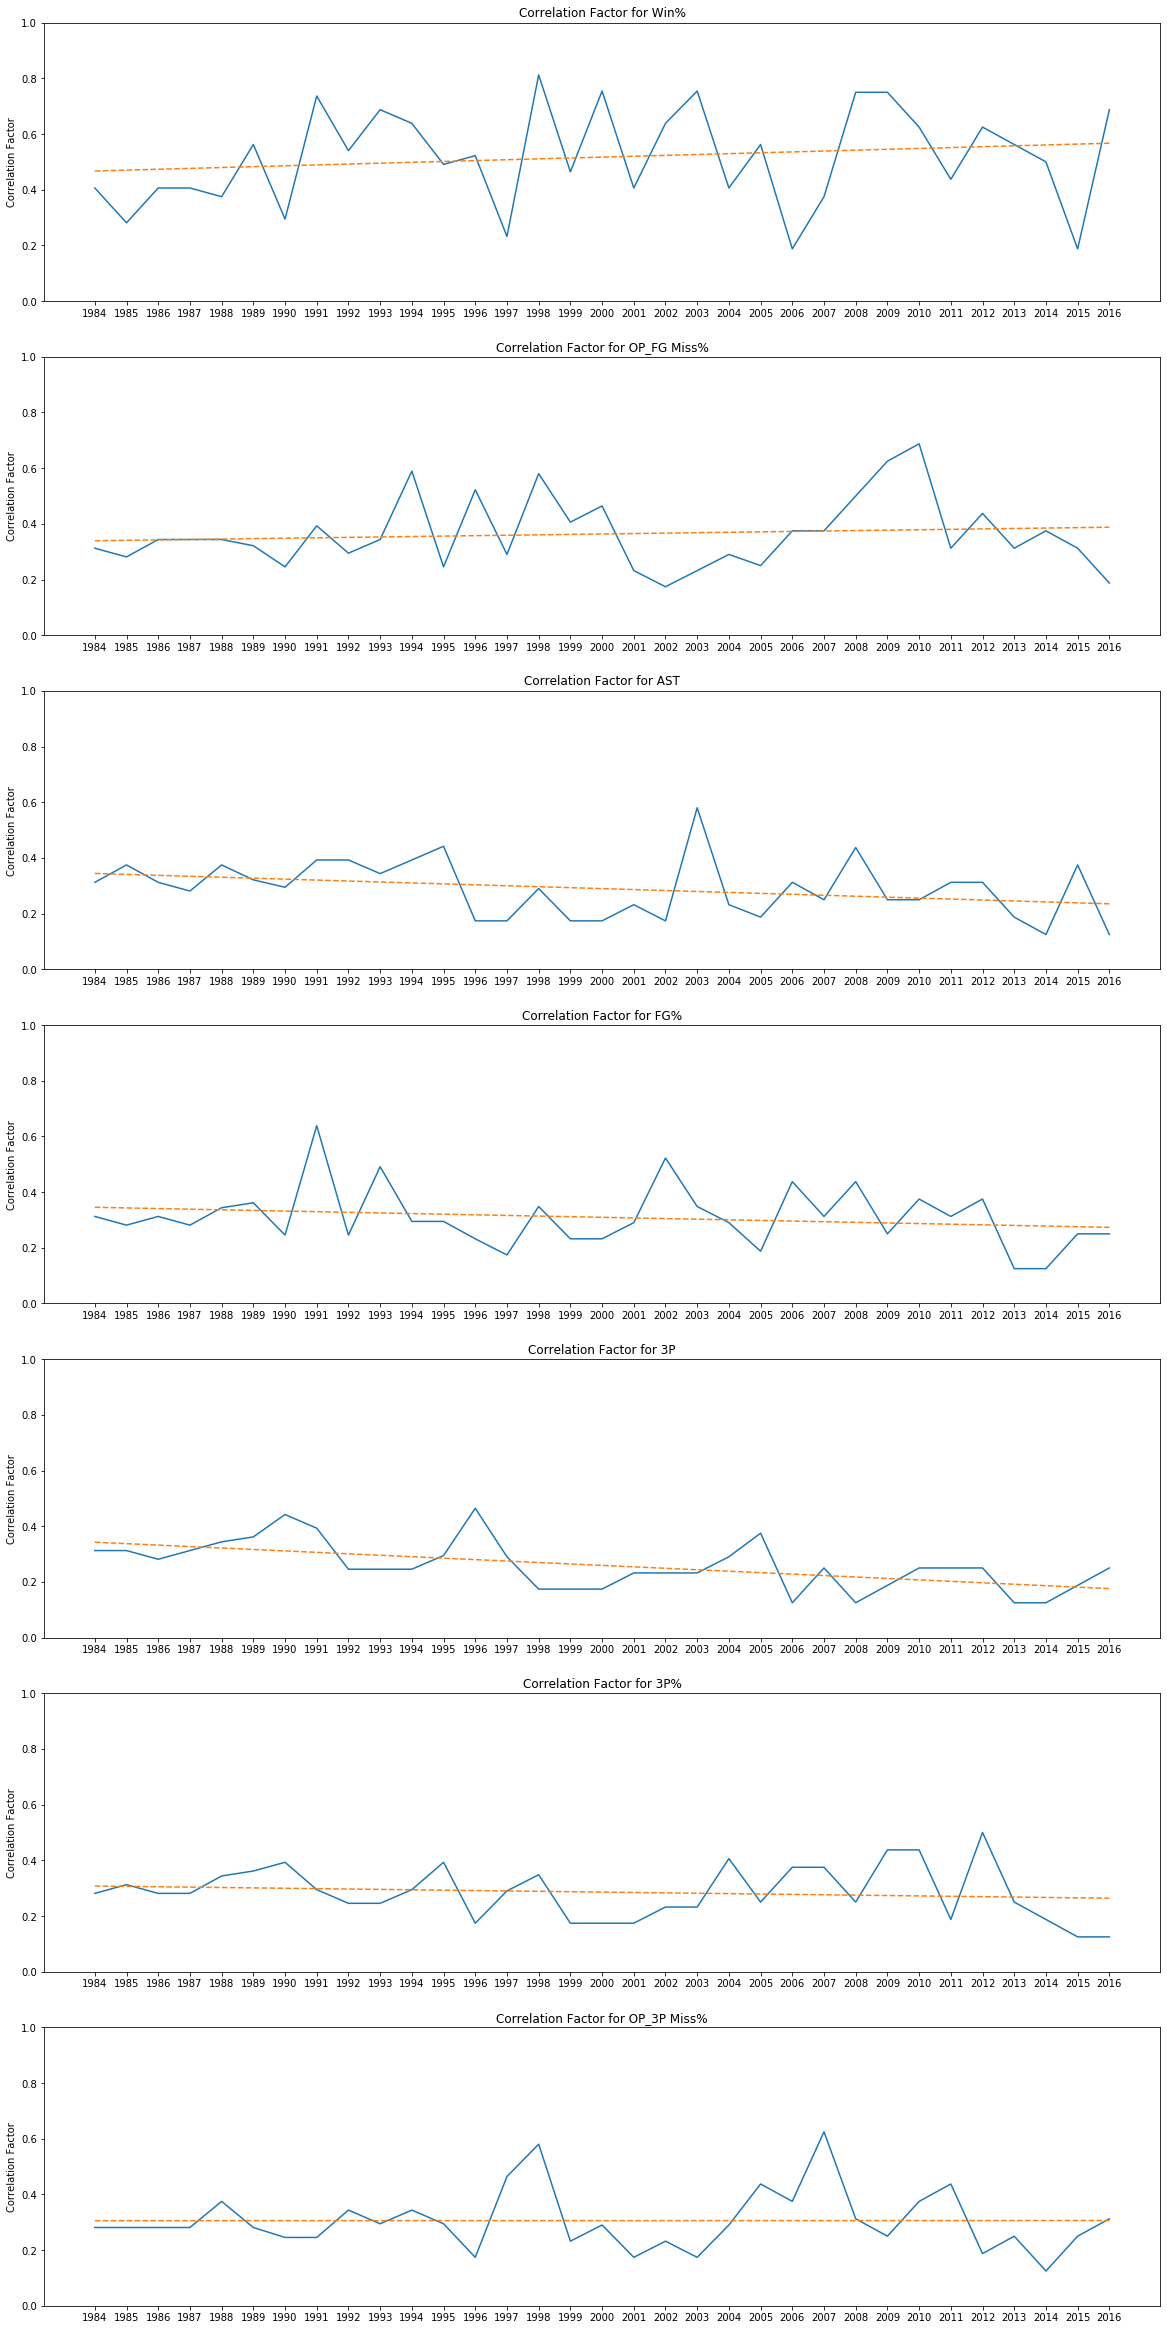

In [2]:
plt.figure(figsize = (20,42))


plt.subplot(7, 1, 1)
z = np.polyfit(list(range(33)), list(WinPer_Year.values()), 1)
p = np.poly1d(z)
xp = np.linspace(0, 32, 33)
plt.plot(list(WinPer_Year.keys()),list(WinPer_Year.values()),xp, p(xp),'--')
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Correlation Factor for Win%')


plt.subplot(7, 1, 2)
z = np.polyfit(list(range(33)), list(OP_FG_MissPer_Year.values()), 1)
p = np.poly1d(z)
xp = np.linspace(0, 32, 33)
plt.plot(list(OP_FG_MissPer_Year.keys()),list(OP_FG_MissPer_Year.values()),xp, p(xp),'--')
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Correlation Factor for OP_FG Miss%')


plt.subplot(7, 1, 3)
z = np.polyfit(list(range(33)), list(Ast_Year.values()), 1)
p = np.poly1d(z)
xp = np.linspace(0, 32, 33)
plt.plot(list(Ast_Year.keys()),list(Ast_Year.values()),xp, p(xp),'--')
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Correlation Factor for AST')


plt.subplot(7, 1, 4)
z = np.polyfit(list(range(33)), list(FGPer_Year.values()), 1)
p = np.poly1d(z)
xp = np.linspace(0, 32, 33)
plt.plot(list(FGPer_Year.keys()),list(FGPer_Year.values()),xp, p(xp),'--')
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Correlation Factor for FG%')


plt.subplot(7, 1, 5)
z = np.polyfit(list(range(33)), list(Three_Year.values()), 1)
p = np.poly1d(z)
xp = np.linspace(0, 32, 33)
plt.plot(list(Three_Year.keys()),list(Three_Year.values()),xp, p(xp),'--')
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Correlation Factor for 3P')


plt.subplot(7, 1, 6)
z = np.polyfit(list(range(33)), list(ThreePer_Year.values()), 1)
p = np.poly1d(z)
xp = np.linspace(0, 32, 33)
plt.plot(list(ThreePer_Year.keys()),list(ThreePer_Year.values()),xp, p(xp),'--')
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Correlation Factor for 3P%')


plt.subplot(7, 1, 7)
z = np.polyfit(list(range(33)), list(OP_3P_MissPer_Year.values()), 1)
p = np.poly1d(z)
xp = np.linspace(0, 32, 33)
plt.plot(list(OP_3P_MissPer_Year.keys()),list(OP_3P_MissPer_Year.values()),xp, p(xp),'--')
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Correlation Factor for OP_3P Miss%')

plt.show()

In [3]:
Average_Cor_Vals = {'WinPer_Avg':(sum(WinPer_Year.values()))/33, 'OP_FG_MissPer_Avg':(sum(OP_FG_MissPer_Year.values()))/33, 'Ast_Avg':(sum(Ast_Year.values()))/33, 'FGPer_Avg':(sum(FGPer_Year.values()))/33, 'Three_Avg': (sum(Three_Year.values()))/33, 'ThreePer_Avg': (sum(ThreePer_Year.values()))/33, 'OP_3P_MisserPer_Avg': (sum(OP_3P_MissPer_Year.values()))/33}
d = list(Average_Cor_Vals.values())[0]
WinPer_F = list(Average_Cor_Vals.values())[0] /d
OP_FG_MissPer_F = list(Average_Cor_Vals.values())[1] /d
Ast_F = list(Average_Cor_Vals.values())[2] /d
FGPer_F = list(Average_Cor_Vals.values())[3] /d
Three_F = list(Average_Cor_Vals.values())[4] /d
ThreePer_F = list(Average_Cor_Vals.values())[5] /d
OP_3P_MissPer_F = list(Average_Cor_Vals.values())[6] /d

In [4]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
import operator
%matplotlib inline

factors = {}
WinPer_Year = {}
OP_FG_MissPer_Year = {}
Ast_Year = {}
FGPer_Year = {}
Three_Year = {}
ThreePer_Year = {}
OP_3P_MissPer_Year = {}

Team_List = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2017'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,False,True,True,False,False,False,True,True,True,True,False,True,False,True,False,False,False,True,False,False,False,True,False,True,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2017 = DF

Team_List = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2018'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,True,True,True,False,True,False,True,False,True,False,True,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2018 = DF

Team_List = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2019'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,True,False,False,False,False,True,True,True,True,True,True,False,False,False,True,False,False,False,True,True,True,False,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
WinPer_Year[Year] = factors['Win%']
OP_FG_MissPer_Year[Year] = factors['OP_FG Miss%']
Ast_Year[Year] = factors['AST']
FGPer_Year[Year] = factors['FG%']
Three_Year[Year] = factors['3P']
ThreePer_Year[Year] = factors['3P%']
OP_3P_MissPer_Year[Year] = factors['OP_3P Miss%']
DF_2019 = DF

In [5]:
ErrorDF17_1 = DF_2017.sort_values(by=['Win%'], ascending = False).loc[:,'Playoff Birth']
ErrorDF17_1 = ErrorDF17_1.reset_index(drop=True)
ErrorDF17_1.iloc[:16]
n = 0
for teams in ErrorDF17_1.iloc[:16]:
    if teams == False:
        n += 1
Error17 = n/16
print(Error17)

Factor1 = DF_2017['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2017['Win%']
DF_2017.insert(2,"Factor1",Factor1)
ErrorDF17_1 = DF_2017.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF17_1 = ErrorDF17_1.reset_index(drop=True)
ErrorDF17_1.iloc[:16]
n = 0
for teams in ErrorDF17_1.iloc[:16]:
    if teams == False:
        n += 1
Error17_1 = n/16
print(Error17_1)

Factor2 = Factor1 + (DF_2017['AST'] * Ast_F)
DF_2017.insert(2,"Factor2",Factor2)
ErrorDF17_2 = DF_2017.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF17_2 = ErrorDF17_2.reset_index(drop=True)
ErrorDF17_2.iloc[:16]
n = 0
for teams in ErrorDF17_2.iloc[:16]:
    if teams == False:
        n += 1
Error17_2 = n/16
print(Error17_2)

Factor3 = Factor2 + (DF_2017['FG%'] * FGPer_F)
DF_2017.insert(2,"Factor3",Factor3)
ErrorDF17_3 = DF_2017.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF17_3 = ErrorDF17_3.reset_index(drop=True)
ErrorDF17_3.iloc[:16]
n = 0
for teams in ErrorDF17_3.iloc[:16]:
    if teams == False:
        n += 1
Error17_3 = n/16
print(Error17_3)

Factor4 = Factor3 + (DF_2017['3P%'] * ThreePer_F)
DF_2017.insert(2,"Factor4",Factor4)
ErrorDF17_4 = DF_2017.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF17_4 = ErrorDF17_4.reset_index(drop=True)
ErrorDF17_4.iloc[:16]
n = 0
for teams in ErrorDF17_4.iloc[:16]:
    if teams == False:
        n += 1
Error17_4 = n/16
print(Error17_4)

Factor5 = Factor4 + (DF_2017['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2017.insert(2,"Factor5",Factor5)
ErrorDF17_5 = DF_2017.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF17_5 = ErrorDF17_5.reset_index(drop=True)
ErrorDF17_5.iloc[:16]
n = 0
for teams in ErrorDF17_5.iloc[:16]:
    if teams == False:
        n += 1
Error17_5 = n/16
print(Error17_5)

0.1875
0.1875
0.1875
0.125
0.125
0.125


In [6]:
ErrorDF18_1 = DF_2018.sort_values(by=['Win%'], ascending = False).loc[:,'Playoff Birth']
ErrorDF18_1 = ErrorDF18_1.reset_index(drop=True)
ErrorDF18_1.iloc[:16]
n = 0
for teams in ErrorDF18_1.iloc[:16]:
    if teams == False:
        n += 1
Error18 = n/16
print(Error18)

Factor1 = DF_2018['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2018['Win%']
DF_2018.insert(2,"Factor1",Factor1)
ErrorDF18_1 = DF_2018.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF18_1 = ErrorDF18_1.reset_index(drop=True)
ErrorDF18_1.iloc[:16]
n = 0
for teams in ErrorDF18_1.iloc[:16]:
    if teams == False:
        n += 1
Error18_1 = n/16
print(Error18_1)

Factor2 = Factor1 + (DF_2018['AST'] * Ast_F)
DF_2018.insert(2,"Factor2",Factor2)
ErrorDF18_2 = DF_2018.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF18_2 = ErrorDF18_2.reset_index(drop=True)
ErrorDF18_2.iloc[:16]
n = 0
for teams in ErrorDF18_2.iloc[:16]:
    if teams == False:
        n += 1
Error18_2 = n/16
print(Error18_2)

Factor3 = Factor2 + (DF_2018['FG%'] * FGPer_F)
DF_2018.insert(2,"Factor3",Factor3)
ErrorDF18_3 = DF_2018.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF18_3 = ErrorDF18_3.reset_index(drop=True)
ErrorDF18_3.iloc[:16]
n = 0
for teams in ErrorDF18_3.iloc[:16]:
    if teams == False:
        n += 1
Error18_3 = n/16
print(Error18_3)

Factor4 = Factor3 + (DF_2018['3P%'] * ThreePer_F)
DF_2018.insert(2,"Factor4",Factor4)
ErrorDF18_4 = DF_2018.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF18_4 = ErrorDF18_4.reset_index(drop=True)
ErrorDF18_4.iloc[:16]
n = 0
for teams in ErrorDF18_4.iloc[:16]:
    if teams == False:
        n += 1
Error18_4 = n/16
print(Error18_4)

Factor5 = Factor4 + (DF_2018['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2018.insert(2,"Factor5",Factor5)
ErrorDF18_5 = DF_2018.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF18_5 = ErrorDF18_5.reset_index(drop=True)
ErrorDF18_5.iloc[:16]
n = 0
for teams in ErrorDF18_5.iloc[:16]:
    if teams == False:
        n += 1
Error18_5 = n/16
print(Error18_5)

0.1875
0.1875
0.1875
0.1875
0.1875
0.1875


In [7]:
ErrorDF19_1 = DF_2019.sort_values(by=['Win%'], ascending = False).loc[:,'Playoff Birth']
ErrorDF19_1 = ErrorDF19_1.reset_index(drop=True)
ErrorDF19_1.iloc[:16]
n = 0
for teams in ErrorDF19_1.iloc[:16]:
    if teams == False:
        n += 1
Error19 = n/16
print(Error19)

Factor1 = DF_2019['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2019['Win%']
DF_2019.insert(2,"Factor1",Factor1)
ErrorDF19_1 = DF_2019.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF19_1 = ErrorDF19_1.reset_index(drop=True)
ErrorDF19_1.iloc[:16]
n = 0
for teams in ErrorDF19_1.iloc[:16]:
    if teams == False:
        n += 1
Error19_1 = n/16
print(Error19_1)

Factor2 = Factor1 + (DF_2019['AST'] * Ast_F)
DF_2019.insert(2,"Factor2",Factor2)
ErrorDF19_2 = DF_2019.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF19_2 = ErrorDF19_2.reset_index(drop=True)
ErrorDF19_2.iloc[:16]
n = 0
for teams in ErrorDF19_2.iloc[:16]:
    if teams == False:
        n += 1
Error19_2 = n/16
print(Error19_2)

Factor3 = Factor2 + (DF_2019['FG%'] * FGPer_F)
DF_2019.insert(2,"Factor3",Factor3)
ErrorDF19_3 = DF_2019.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF19_3 = ErrorDF19_3.reset_index(drop=True)
ErrorDF19_3.iloc[:16]
n = 0
for teams in ErrorDF19_3.iloc[:16]:
    if teams == False:
        n += 1
Error19_3 = n/16
print(Error19_3)

Factor4 = Factor3 + (DF_2019['3P%'] * ThreePer_F)
DF_2019.insert(2,"Factor4",Factor4)
ErrorDF19_4 = DF_2019.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF19_4 = ErrorDF19_4.reset_index(drop=True)
ErrorDF19_4.iloc[:16]
n = 0
for teams in ErrorDF19_4.iloc[:16]:
    if teams == False:
        n += 1
Error19_4 = n/16
print(Error19_4)

Factor5 = Factor4 + (DF_2019['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2019.insert(2,"Factor5",Factor5)
ErrorDF19_5 = DF_2019.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF19_5 = ErrorDF19_5.reset_index(drop=True)
ErrorDF19_5.iloc[:16]
n = 0
for teams in ErrorDF19_5.iloc[:16]:
    if teams == False:
        n += 1
Error19_5 = n/16
print(Error19_5)

0.25
0.25
0.3125
0.3125
0.25
0.25


In [80]:
(Error19_5 + Error18_5 + Error17_5)/3

0.1875

In [8]:
WinPer_GF = 0.003117*32 *100
 
OP_FG_MissPer_GF = 0.001519*32*100
 
AST_GF = -0.003409*32*100
 
FGPer_GF = -0.002247*32*100
 
Three_GF = -0.005204*32*100
 
ThreePer_GF = -0.001373*32*100
 
OP_3P_MissPer_GF = 1.492e-05*32*100

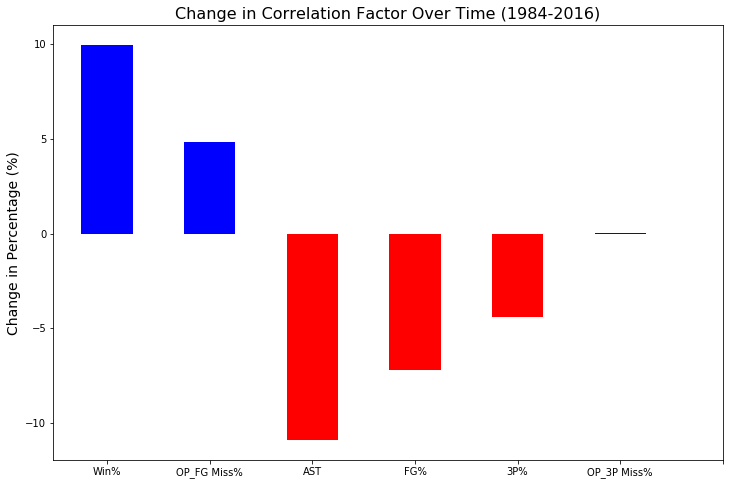

In [5]:
x = range(6)
negative_data = [0,0,AST_GF,FGPer_GF,ThreePer_GF,0]
positive_data = [WinPer_GF,OP_FG_MissPer_GF,0,0,0,OP_3P_MissPer_GF]

fig = plt.figure(figsize = (12,8))
ax = plt.subplot()
ax.bar(x, negative_data, width=0.5, color='r')
ax.bar(x, positive_data, width=0.5, color='b')
plt.xticks(np.arange(7),('Win%','OP_FG Miss%','AST','FG%','3P%','OP_3P Miss%'))
plt.ylabel('Change in Percentage (%)',fontsize = 14)
plt.title('Change in Correlation Factor Over Time (1984-2016)', fontsize = 16)
plt.savefig('Correlation_Over_Time.png')


plt.show()

In [9]:
ErrorDF95_1 = DF_1995.sort_values(by=['Win%'], ascending = False).loc[:,'Playoff Birth']
ErrorDF95_1 = ErrorDF95_1.reset_index(drop=True)
ErrorDF95_1.iloc[:16]
n = 0
for teams in ErrorDF95_1.iloc[:16]:
    if teams == False:
        n += 1
Error95 = n/16
print(Error95)

Factor1 = DF_1995['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_1995['Win%']
DF_1995.insert(2,"Factor1",Factor1)
ErrorDF95_1 = DF_1995.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF95_1 = ErrorDF95_1.reset_index(drop=True)
ErrorDF95_1.iloc[:16]
n = 0
for teams in ErrorDF95_1.iloc[:16]:
    if teams == False:
        n += 1
Error95_1 = n/16
print(Error95_1)

Factor2 = Factor1 + (DF_1995['AST'] * Ast_F)
DF_1995.insert(2,"Factor2",Factor2)
ErrorDF95_2 = DF_1995.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF95_2 = ErrorDF95_2.reset_index(drop=True)
ErrorDF95_2.iloc[:16]
n = 0
for teams in ErrorDF95_2.iloc[:16]:
    if teams == False:
        n += 1
Error95_2 = n/16
print(Error95_2)

Factor3 = Factor2 + (DF_1995['FG%'] * FGPer_F)
DF_1995.insert(2,"Factor3",Factor3)
ErrorDF95_3 = DF_1995.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF95_3 = ErrorDF95_3.reset_index(drop=True)
ErrorDF95_3.iloc[:16]
n = 0
for teams in ErrorDF95_3.iloc[:16]:
    if teams == False:
        n += 1
Error95_3 = n/16
print(Error95_3)

Factor4 = Factor3 + (DF_1995['3P%'] * ThreePer_F)
DF_1995.insert(2,"Factor4",Factor4)
ErrorDF95_4 = DF_1995.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF95_4 = ErrorDF95_4.reset_index(drop=True)
ErrorDF95_4.iloc[:16]
n = 0
for teams in ErrorDF95_4.iloc[:16]:
    if teams == False:
        n += 1
Error95_4 = n/16
print(Error95_4)

Factor5 = Factor4 + (DF_1995['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_1995.insert(2,"Factor5",Factor5)
ErrorDF95_5 = DF_1995.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF95_5 = ErrorDF95_5.reset_index(drop=True)
ErrorDF95_5.iloc[:16]
n = 0
for teams in ErrorDF95_5.iloc[:16]:
    if teams == False:
        n += 1
Error95_5 = n/16
print(Error95_5)

ErrorDF95_1 = DF_1995.sort_values(by=['Win%'], ascending = False).loc[:,'Playoff Birth']
ErrorDF95_1 = ErrorDF95_1.reset_index(drop=True)
ErrorDF95_1.iloc[:16]
n = 0
for teams in ErrorDF95_1.iloc[:16]:
    if teams == False:
        n += 1
Error95 = n/16
print(Error95)



Factor1 = DF_1996['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_1996['Win%']
DF_1996.insert(2,"Factor1",Factor1)
ErrorDF96_1 = DF_1996.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF96_1 = ErrorDF96_1.reset_index(drop=True)
ErrorDF96_1.iloc[:16]
n = 0
for teams in ErrorDF96_1.iloc[:16]:
    if teams == False:
        n += 1
Error96_1 = n/16
print(Error96_1)

Factor2 = Factor1 + (DF_1996['AST'] * Ast_F)
DF_1996.insert(2,"Factor2",Factor2)
ErrorDF96_2 = DF_1996.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF96_2 = ErrorDF96_2.reset_index(drop=True)
ErrorDF96_2.iloc[:16]
n = 0
for teams in ErrorDF96_2.iloc[:16]:
    if teams == False:
        n += 1
Error96_2 = n/16
print(Error96_2)

Factor3 = Factor2 + (DF_1996['FG%'] * FGPer_F)
DF_1996.insert(2,"Factor3",Factor3)
ErrorDF96_3 = DF_1996.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF96_3 = ErrorDF96_3.reset_index(drop=True)
ErrorDF96_3.iloc[:16]
n = 0
for teams in ErrorDF96_3.iloc[:16]:
    if teams == False:
        n += 1
Error96_3 = n/16
print(Error96_3)

Factor4 = Factor3 + (DF_1996['3P%'] * ThreePer_F)
DF_1996.insert(2,"Factor4",Factor4)
ErrorDF96_4 = DF_1996.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF96_4 = ErrorDF96_4.reset_index(drop=True)
ErrorDF96_4.iloc[:16]
n = 0
for teams in ErrorDF96_4.iloc[:16]:
    if teams == False:
        n += 1
Error96_4 = n/16
print(Error96_4)

Factor5 = Factor4 + (DF_1996['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_1996.insert(2,"Factor5",Factor5)
ErrorDF96_5 = DF_1996.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF96_5 = ErrorDF96_5.reset_index(drop=True)
ErrorDF96_5.iloc[:16]
n = 0
for teams in ErrorDF96_5.iloc[:16]:
    if teams == False:
        n += 1
Error96_5 = n/16
print(Error96_5)



Factor1 = DF_1997['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_1997['Win%']
DF_1997.insert(2,"Factor1",Factor1)
ErrorDF97_1 = DF_1997.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF97_1 = ErrorDF97_1.reset_index(drop=True)
ErrorDF97_1.iloc[:16]
n = 0
for teams in ErrorDF97_1.iloc[:16]:
    if teams == False:
        n += 1
Error97_1 = n/16
print(Error97_1)

Factor2 = Factor1 + (DF_1997['AST'] * Ast_F)
DF_1997.insert(2,"Factor2",Factor2)
ErrorDF97_2 = DF_1997.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF97_2 = ErrorDF97_2.reset_index(drop=True)
ErrorDF97_2.iloc[:16]
n = 0
for teams in ErrorDF97_2.iloc[:16]:
    if teams == False:
        n += 1
Error97_2 = n/16
print(Error97_2)

Factor3 = Factor2 + (DF_1997['FG%'] * FGPer_F)
DF_1997.insert(2,"Factor3",Factor3)
ErrorDF97_3 = DF_1997.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF97_3 = ErrorDF97_3.reset_index(drop=True)
ErrorDF97_3.iloc[:16]
n = 0
for teams in ErrorDF97_3.iloc[:16]:
    if teams == False:
        n += 1
Error97_3 = n/16
print(Error97_3)

Factor4 = Factor3 + (DF_1997['3P%'] * ThreePer_F)
DF_1997.insert(2,"Factor4",Factor4)
ErrorDF97_4 = DF_1997.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF97_4 = ErrorDF97_4.reset_index(drop=True)
ErrorDF97_4.iloc[:16]
n = 0
for teams in ErrorDF97_4.iloc[:16]:
    if teams == False:
        n += 1
Error97_4 = n/16
print(Error97_4)

Factor5 = Factor4 + (DF_1997['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_1997.insert(2,"Factor5",Factor5)
ErrorDF97_5 = DF_1997.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF97_5 = ErrorDF97_5.reset_index(drop=True)
ErrorDF97_5.iloc[:16]
n = 0
for teams in ErrorDF97_5.iloc[:16]:
    if teams == False:
        n += 1
Error97_5 = n/16
print(Error97_5)



Factor1 = DF_1998['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_1998['Win%']
DF_1998.insert(2,"Factor1",Factor1)
ErrorDF98_1 = DF_1998.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF98_1 = ErrorDF98_1.reset_index(drop=True)
ErrorDF98_1.iloc[:16]
n = 0
for teams in ErrorDF98_1.iloc[:16]:
    if teams == False:
        n += 1
Error98_1 = n/16
print(Error98_1)

Factor2 = Factor1 + (DF_1998['AST'] * Ast_F)
DF_1998.insert(2,"Factor2",Factor2)
ErrorDF98_2 = DF_1998.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF98_2 = ErrorDF98_2.reset_index(drop=True)
ErrorDF98_2.iloc[:16]
n = 0
for teams in ErrorDF98_2.iloc[:16]:
    if teams == False:
        n += 1
Error98_2 = n/16
print(Error98_2)

Factor3 = Factor2 + (DF_1998['FG%'] * FGPer_F)
DF_1998.insert(2,"Factor3",Factor3)
ErrorDF98_3 = DF_1998.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF98_3 = ErrorDF98_3.reset_index(drop=True)
ErrorDF98_3.iloc[:16]
n = 0
for teams in ErrorDF98_3.iloc[:16]:
    if teams == False:
        n += 1
Error98_3 = n/16
print(Error98_3)

Factor4 = Factor3 + (DF_1998['3P%'] * ThreePer_F)
DF_1998.insert(2,"Factor4",Factor4)
ErrorDF98_4 = DF_1998.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF98_4 = ErrorDF98_4.reset_index(drop=True)
ErrorDF98_4.iloc[:16]
n = 0
for teams in ErrorDF98_4.iloc[:16]:
    if teams == False:
        n += 1
Error98_4 = n/16
print(Error98_4)

Factor5 = Factor4 + (DF_1998['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_1998.insert(2,"Factor5",Factor5)
ErrorDF98_5 = DF_1998.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF98_5 = ErrorDF98_5.reset_index(drop=True)
ErrorDF98_5.iloc[:16]
n = 0
for teams in ErrorDF98_5.iloc[:16]:
    if teams == False:
        n += 1
Error98_5 = n/16
print(Error98_5)



Factor1 = DF_1999['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_1999['Win%']
DF_1999.insert(2,"Factor1",Factor1)
ErrorDF99_1 = DF_1999.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF99_1 = ErrorDF99_1.reset_index(drop=True)
ErrorDF99_1.iloc[:16]
n = 0
for teams in ErrorDF99_1.iloc[:16]:
    if teams == False:
        n += 1
Error99_1 = n/16
print(Error99_1)

Factor2 = Factor1 + (DF_1999['AST'] * Ast_F)
DF_1999.insert(2,"Factor2",Factor2)
ErrorDF99_2 = DF_1999.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF99_2 = ErrorDF99_2.reset_index(drop=True)
ErrorDF99_2.iloc[:16]
n = 0
for teams in ErrorDF99_2.iloc[:16]:
    if teams == False:
        n += 1
Error99_2 = n/16
print(Error99_2)

Factor3 = Factor2 + (DF_1999['FG%'] * FGPer_F)
DF_1999.insert(2,"Factor3",Factor3)
ErrorDF99_3 = DF_1999.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF99_3 = ErrorDF99_3.reset_index(drop=True)
ErrorDF99_3.iloc[:16]
n = 0
for teams in ErrorDF99_3.iloc[:16]:
    if teams == False:
        n += 1
Error99_3 = n/16
print(Error99_3)

Factor4 = Factor3 + (DF_1999['3P%'] * ThreePer_F)
DF_1999.insert(2,"Factor4",Factor4)
ErrorDF99_4 = DF_1999.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF99_4 = ErrorDF99_4.reset_index(drop=True)
ErrorDF99_4.iloc[:16]
n = 0
for teams in ErrorDF99_4.iloc[:16]:
    if teams == False:
        n += 1
Error99_4 = n/16
print(Error99_4)

Factor5 = Factor4 + (DF_1999['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_1999.insert(2,"Factor5",Factor5)
ErrorDF99_5 = DF_1999.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF99_5 = ErrorDF99_5.reset_index(drop=True)
ErrorDF99_5.iloc[:16]
n = 0
for teams in ErrorDF99_5.iloc[:16]:
    if teams == False:
        n += 1
Error99_5 = n/16
print(Error99_5)



Factor1 = DF_2000['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2000['Win%']
DF_2000.insert(2,"Factor1",Factor1)
ErrorDF00_1 = DF_2000.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF00_1 = ErrorDF00_1.reset_index(drop=True)
ErrorDF00_1.iloc[:16]
n = 0
for teams in ErrorDF00_1.iloc[:16]:
    if teams == False:
        n += 1
Error00_1 = n/16
print(Error00_1)

Factor2 = Factor1 + (DF_2000['AST'] * Ast_F)
DF_2000.insert(2,"Factor2",Factor2)
ErrorDF00_2 = DF_2000.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF00_2 = ErrorDF00_2.reset_index(drop=True)
ErrorDF00_2.iloc[:16]
n = 0
for teams in ErrorDF00_2.iloc[:16]:
    if teams == False:
        n += 1
Error00_2 = n/16
print(Error00_2)

Factor3 = Factor2 + (DF_2000['FG%'] * FGPer_F)
DF_2000.insert(2,"Factor3",Factor3)
ErrorDF00_3 = DF_2000.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF00_3 = ErrorDF00_3.reset_index(drop=True)
ErrorDF00_3.iloc[:16]
n = 0
for teams in ErrorDF00_3.iloc[:16]:
    if teams == False:
        n += 1
Error00_3 = n/16
print(Error00_3)

Factor4 = Factor3 + (DF_2000['3P%'] * ThreePer_F)
DF_2000.insert(2,"Factor4",Factor4)
ErrorDF00_4 = DF_2000.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF00_4 = ErrorDF00_4.reset_index(drop=True)
ErrorDF00_4.iloc[:16]
n = 0
for teams in ErrorDF00_4.iloc[:16]:
    if teams == False:
        n += 1
Error00_4 = n/16
print(Error00_4)

Factor5 = Factor4 + (DF_2000['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2000.insert(2,"Factor5",Factor5)
ErrorDF00_5 = DF_2000.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF00_5 = ErrorDF00_5.reset_index(drop=True)
ErrorDF00_5.iloc[:16]
n = 0
for teams in ErrorDF00_5.iloc[:16]:
    if teams == False:
        n += 1
Error00_5 = n/16
print(Error00_5)



Factor1 = DF_2001['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2001['Win%']
DF_2001.insert(2,"Factor1",Factor1)
ErrorDF01_1 = DF_2001.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF01_1 = ErrorDF01_1.reset_index(drop=True)
ErrorDF01_1.iloc[:16]
n = 0
for teams in ErrorDF01_1.iloc[:16]:
    if teams == False:
        n += 1
Error01_1 = n/16
print(Error01_1)

Factor2 = Factor1 + (DF_2001['AST'] * Ast_F)
DF_2001.insert(2,"Factor2",Factor2)
ErrorDF01_2 = DF_2001.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF01_2 = ErrorDF01_2.reset_index(drop=True)
ErrorDF01_2.iloc[:16]
n = 0
for teams in ErrorDF01_2.iloc[:16]:
    if teams == False:
        n += 1
Error01_2 = n/16
print(Error01_2)

Factor3 = Factor2 + (DF_2001['FG%'] * FGPer_F)
DF_2001.insert(2,"Factor3",Factor3)
ErrorDF01_3 = DF_2001.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF01_3 = ErrorDF01_3.reset_index(drop=True)
ErrorDF01_3.iloc[:16]
n = 0
for teams in ErrorDF01_3.iloc[:16]:
    if teams == False:
        n += 1
Error01_3 = n/16
print(Error01_3)

Factor4 = Factor3 + (DF_2001['3P%'] * ThreePer_F)
DF_2001.insert(2,"Factor4",Factor4)
ErrorDF01_4 = DF_2001.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF01_4 = ErrorDF01_4.reset_index(drop=True)
ErrorDF01_4.iloc[:16]
n = 0
for teams in ErrorDF01_4.iloc[:16]:
    if teams == False:
        n += 1
Error01_4 = n/16
print(Error01_4)

Factor5 = Factor4 + (DF_2001['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2001.insert(2,"Factor5",Factor5)
ErrorDF01_5 = DF_2001.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF01_5 = ErrorDF01_5.reset_index(drop=True)
ErrorDF01_5.iloc[:16]
n = 0
for teams in ErrorDF01_5.iloc[:16]:
    if teams == False:
        n += 1
Error01_5 = n/16
print(Error01_5)



Factor1 = DF_2002['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2002['Win%']
DF_2002.insert(2,"Factor1",Factor1)
ErrorDF02_1 = DF_2002.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF02_1 = ErrorDF02_1.reset_index(drop=True)
ErrorDF02_1.iloc[:16]
n = 0
for teams in ErrorDF02_1.iloc[:16]:
    if teams == False:
        n += 1
Error02_1 = n/16
print(Error02_1)

Factor2 = Factor1 + (DF_2002['AST'] * Ast_F)
DF_2002.insert(2,"Factor2",Factor2)
ErrorDF02_2 = DF_2002.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF02_2 = ErrorDF02_2.reset_index(drop=True)
ErrorDF02_2.iloc[:16]
n = 0
for teams in ErrorDF02_2.iloc[:16]:
    if teams == False:
        n += 1
Error02_2 = n/16
print(Error02_2)

Factor3 = Factor2 + (DF_2002['FG%'] * FGPer_F)
DF_2002.insert(2,"Factor3",Factor3)
ErrorDF02_3 = DF_2002.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF02_3 = ErrorDF02_3.reset_index(drop=True)
ErrorDF02_3.iloc[:16]
n = 0
for teams in ErrorDF02_3.iloc[:16]:
    if teams == False:
        n += 1
Error02_3 = n/16
print(Error02_3)

Factor4 = Factor3 + (DF_2002['3P%'] * ThreePer_F)
DF_2002.insert(2,"Factor4",Factor4)
ErrorDF02_4 = DF_2002.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF02_4 = ErrorDF02_4.reset_index(drop=True)
ErrorDF02_4.iloc[:16]
n = 0
for teams in ErrorDF02_4.iloc[:16]:
    if teams == False:
        n += 1
Error02_4 = n/16
print(Error02_4)

Factor5 = Factor4 + (DF_2002['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2002.insert(2,"Factor5",Factor5)
ErrorDF02_5 = DF_2002.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF02_5 = ErrorDF02_5.reset_index(drop=True)
ErrorDF02_5.iloc[:16]
n = 0
for teams in ErrorDF02_5.iloc[:16]:
    if teams == False:
        n += 1
Error02_5 = n/16
print(Error02_5)



Factor1 = DF_2003['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2003['Win%']
DF_2003.insert(2,"Factor1",Factor1)
ErrorDF03_1 = DF_2003.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF03_1 = ErrorDF03_1.reset_index(drop=True)
ErrorDF03_1.iloc[:16]
n = 0
for teams in ErrorDF03_1.iloc[:16]:
    if teams == False:
        n += 1
Error03_1 = n/16
print(Error03_1)

Factor2 = Factor1 + (DF_2003['AST'] * Ast_F)
DF_2003.insert(2,"Factor2",Factor2)
ErrorDF03_2 = DF_2003.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF03_2 = ErrorDF03_2.reset_index(drop=True)
ErrorDF03_2.iloc[:16]
n = 0
for teams in ErrorDF03_2.iloc[:16]:
    if teams == False:
        n += 1
Error03_2 = n/16
print(Error03_2)

Factor3 = Factor2 + (DF_2003['FG%'] * FGPer_F)
DF_2003.insert(2,"Factor3",Factor3)
ErrorDF03_3 = DF_2003.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF03_3 = ErrorDF03_3.reset_index(drop=True)
ErrorDF03_3.iloc[:16]
n = 0
for teams in ErrorDF03_3.iloc[:16]:
    if teams == False:
        n += 1
Error03_3 = n/16
print(Error03_3)

Factor4 = Factor3 + (DF_2003['3P%'] * ThreePer_F)
DF_2003.insert(2,"Factor4",Factor4)
ErrorDF03_4 = DF_2003.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF03_4 = ErrorDF03_4.reset_index(drop=True)
ErrorDF03_4.iloc[:16]
n = 0
for teams in ErrorDF03_4.iloc[:16]:
    if teams == False:
        n += 1
Error03_4 = n/16
print(Error03_4)

Factor5 = Factor4 + (DF_2003['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2003.insert(2,"Factor5",Factor5)
ErrorDF03_5 = DF_2003.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF03_5 = ErrorDF03_5.reset_index(drop=True)
ErrorDF03_5.iloc[:16]
n = 0
for teams in ErrorDF03_5.iloc[:16]:
    if teams == False:
        n += 1
Error03_5 = n/16
print(Error03_5)



Factor1 = DF_2004['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2004['Win%']
DF_2004.insert(2,"Factor1",Factor1)
ErrorDF04_1 = DF_2004.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF04_1 = ErrorDF04_1.reset_index(drop=True)
ErrorDF04_1.iloc[:16]
n = 0
for teams in ErrorDF04_1.iloc[:16]:
    if teams == False:
        n += 1
Error04_1 = n/16
print(Error04_1)

Factor2 = Factor1 + (DF_2004['AST'] * Ast_F)
DF_2004.insert(2,"Factor2",Factor2)
ErrorDF04_2 = DF_2004.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF04_2 = ErrorDF04_2.reset_index(drop=True)
ErrorDF04_2.iloc[:16]
n = 0
for teams in ErrorDF04_2.iloc[:16]:
    if teams == False:
        n += 1
Error04_2 = n/16
print(Error04_2)

Factor3 = Factor2 + (DF_2004['FG%'] * FGPer_F)
DF_2004.insert(2,"Factor3",Factor3)
ErrorDF04_3 = DF_2004.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF04_3 = ErrorDF04_3.reset_index(drop=True)
ErrorDF04_3.iloc[:16]
n = 0
for teams in ErrorDF04_3.iloc[:16]:
    if teams == False:
        n += 1
Error04_3 = n/16
print(Error04_3)

Factor4 = Factor3 + (DF_2004['3P%'] * ThreePer_F)
DF_2004.insert(2,"Factor4",Factor4)
ErrorDF04_4 = DF_2004.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF04_4 = ErrorDF04_4.reset_index(drop=True)
ErrorDF04_4.iloc[:16]
n = 0
for teams in ErrorDF04_4.iloc[:16]:
    if teams == False:
        n += 1
Error04_4 = n/16
print(Error04_4)

Factor5 = Factor4 + (DF_2004['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2004.insert(2,"Factor5",Factor5)
ErrorDF04_5 = DF_2004.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF04_5 = ErrorDF04_5.reset_index(drop=True)
ErrorDF04_5.iloc[:16]
n = 0
for teams in ErrorDF04_5.iloc[:16]:
    if teams == False:
        n += 1
Error04_5 = n/16
print(Error04_5)



Factor1 = DF_2005['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2005['Win%']
DF_2005.insert(2,"Factor1",Factor1)
ErrorDF05_1 = DF_2005.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF05_1 = ErrorDF05_1.reset_index(drop=True)
ErrorDF05_1.iloc[:16]
n = 0
for teams in ErrorDF05_1.iloc[:16]:
    if teams == False:
        n += 1
Error05_1 = n/16
print(Error05_1)

Factor2 = Factor1 + (DF_2005['AST'] * Ast_F)
DF_2005.insert(2,"Factor2",Factor2)
ErrorDF05_2 = DF_2005.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF05_2 = ErrorDF05_2.reset_index(drop=True)
ErrorDF05_2.iloc[:16]
n = 0
for teams in ErrorDF05_2.iloc[:16]:
    if teams == False:
        n += 1
Error05_2 = n/16
print(Error05_2)

Factor3 = Factor2 + (DF_2005['FG%'] * FGPer_F)
DF_2005.insert(2,"Factor3",Factor3)
ErrorDF05_3 = DF_2005.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF05_3 = ErrorDF05_3.reset_index(drop=True)
ErrorDF05_3.iloc[:16]
n = 0
for teams in ErrorDF05_3.iloc[:16]:
    if teams == False:
        n += 1
Error05_3 = n/16
print(Error05_3)

Factor4 = Factor3 + (DF_2005['3P%'] * ThreePer_F)
DF_2005.insert(2,"Factor4",Factor4)
ErrorDF05_4 = DF_2005.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF05_4 = ErrorDF05_4.reset_index(drop=True)
ErrorDF05_4.iloc[:16]
n = 0
for teams in ErrorDF05_4.iloc[:16]:
    if teams == False:
        n += 1
Error05_4 = n/16
print(Error05_4)

Factor5 = Factor4 + (DF_2005['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2005.insert(2,"Factor5",Factor5)
ErrorDF05_5 = DF_2005.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF05_5 = ErrorDF05_5.reset_index(drop=True)
ErrorDF05_5.iloc[:16]
n = 0
for teams in ErrorDF05_5.iloc[:16]:
    if teams == False:
        n += 1
Error05_5 = n/16
print(Error05_5)



Factor1 = DF_2006['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2006['Win%']
DF_2006.insert(2,"Factor1",Factor1)
ErrorDF06_1 = DF_2006.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF06_1 = ErrorDF06_1.reset_index(drop=True)
ErrorDF06_1.iloc[:16]
n = 0
for teams in ErrorDF06_1.iloc[:16]:
    if teams == False:
        n += 1
Error06_1 = n/16
print(Error06_1)

Factor2 = Factor1 + (DF_2006['AST'] * Ast_F)
DF_2006.insert(2,"Factor2",Factor2)
ErrorDF06_2 = DF_2006.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF06_2 = ErrorDF06_2.reset_index(drop=True)
ErrorDF06_2.iloc[:16]
n = 0
for teams in ErrorDF06_2.iloc[:16]:
    if teams == False:
        n += 1
Error06_2 = n/16
print(Error06_2)

Factor3 = Factor2 + (DF_2006['FG%'] * FGPer_F)
DF_2006.insert(2,"Factor3",Factor3)
ErrorDF06_3 = DF_2006.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF06_3 = ErrorDF06_3.reset_index(drop=True)
ErrorDF06_3.iloc[:16]
n = 0
for teams in ErrorDF06_3.iloc[:16]:
    if teams == False:
        n += 1
Error06_3 = n/16
print(Error06_3)

Factor4 = Factor3 + (DF_2006['3P%'] * ThreePer_F)
DF_2006.insert(2,"Factor4",Factor4)
ErrorDF06_4 = DF_2006.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF06_4 = ErrorDF06_4.reset_index(drop=True)
ErrorDF06_4.iloc[:16]
n = 0
for teams in ErrorDF06_4.iloc[:16]:
    if teams == False:
        n += 1
Error06_4 = n/16
print(Error06_4)

Factor5 = Factor4 + (DF_2006['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2006.insert(2,"Factor5",Factor5)
ErrorDF06_5 = DF_2006.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF06_5 = ErrorDF06_5.reset_index(drop=True)
ErrorDF06_5.iloc[:16]
n = 0
for teams in ErrorDF06_5.iloc[:16]:
    if teams == False:
        n += 1
Error06_5 = n/16
print(Error06_5)



Factor1 = DF_2007['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2007['Win%']
DF_2007.insert(2,"Factor1",Factor1)
ErrorDF07_1 = DF_2007.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF07_1 = ErrorDF07_1.reset_index(drop=True)
ErrorDF07_1.iloc[:16]
n = 0
for teams in ErrorDF07_1.iloc[:16]:
    if teams == False:
        n += 1
Error07_1 = n/16
print(Error07_1)

Factor2 = Factor1 + (DF_2007['AST'] * Ast_F)
DF_2007.insert(2,"Factor2",Factor2)
ErrorDF07_2 = DF_2007.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF07_2 = ErrorDF07_2.reset_index(drop=True)
ErrorDF07_2.iloc[:16]
n = 0
for teams in ErrorDF07_2.iloc[:16]:
    if teams == False:
        n += 1
Error07_2 = n/16
print(Error07_2)

Factor3 = Factor2 + (DF_2007['FG%'] * FGPer_F)
DF_2007.insert(2,"Factor3",Factor3)
ErrorDF07_3 = DF_2007.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF07_3 = ErrorDF07_3.reset_index(drop=True)
ErrorDF07_3.iloc[:16]
n = 0
for teams in ErrorDF07_3.iloc[:16]:
    if teams == False:
        n += 1
Error07_3 = n/16
print(Error07_3)

Factor4 = Factor3 + (DF_2007['3P%'] * ThreePer_F)
DF_2007.insert(2,"Factor4",Factor4)
ErrorDF07_4 = DF_2007.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF07_4 = ErrorDF07_4.reset_index(drop=True)
ErrorDF07_4.iloc[:16]
n = 0
for teams in ErrorDF07_4.iloc[:16]:
    if teams == False:
        n += 1
Error07_4 = n/16
print(Error07_4)

Factor5 = Factor4 + (DF_2007['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2007.insert(2,"Factor5",Factor5)
ErrorDF07_5 = DF_2007.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF07_5 = ErrorDF07_5.reset_index(drop=True)
ErrorDF07_5.iloc[:16]
n = 0
for teams in ErrorDF07_5.iloc[:16]:
    if teams == False:
        n += 1
Error07_5 = n/16
print(Error07_5)



Factor1 = DF_2008['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2008['Win%']
DF_2008.insert(2,"Factor1",Factor1)
ErrorDF08_1 = DF_2008.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF08_1 = ErrorDF08_1.reset_index(drop=True)
ErrorDF08_1.iloc[:16]
n = 0
for teams in ErrorDF08_1.iloc[:16]:
    if teams == False:
        n += 1
Error08_1 = n/16
print(Error08_1)

Factor2 = Factor1 + (DF_2008['AST'] * Ast_F)
DF_2008.insert(2,"Factor2",Factor2)
ErrorDF08_2 = DF_2008.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF08_2 = ErrorDF08_2.reset_index(drop=True)
ErrorDF08_2.iloc[:16]
n = 0
for teams in ErrorDF08_2.iloc[:16]:
    if teams == False:
        n += 1
Error08_2 = n/16
print(Error08_2)

Factor3 = Factor2 + (DF_2008['FG%'] * FGPer_F)
DF_2008.insert(2,"Factor3",Factor3)
ErrorDF08_3 = DF_2008.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF08_3 = ErrorDF08_3.reset_index(drop=True)
ErrorDF08_3.iloc[:16]
n = 0
for teams in ErrorDF08_3.iloc[:16]:
    if teams == False:
        n += 1
Error08_3 = n/16
print(Error08_3)

Factor4 = Factor3 + (DF_2008['3P%'] * ThreePer_F)
DF_2008.insert(2,"Factor4",Factor4)
ErrorDF08_4 = DF_2008.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF08_4 = ErrorDF08_4.reset_index(drop=True)
ErrorDF08_4.iloc[:16]
n = 0
for teams in ErrorDF08_4.iloc[:16]:
    if teams == False:
        n += 1
Error08_4 = n/16
print(Error08_4)

Factor5 = Factor4 + (DF_2008['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2008.insert(2,"Factor5",Factor5)
ErrorDF08_5 = DF_2008.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF08_5 = ErrorDF08_5.reset_index(drop=True)
ErrorDF08_5.iloc[:16]
n = 0
for teams in ErrorDF08_5.iloc[:16]:
    if teams == False:
        n += 1
Error08_5 = n/16
print(Error08_5)



Factor1 = DF_2009['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2009['Win%']
DF_2009.insert(2,"Factor1",Factor1)
ErrorDF09_1 = DF_2009.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF09_1 = ErrorDF09_1.reset_index(drop=True)
ErrorDF09_1.iloc[:16]
n = 0
for teams in ErrorDF09_1.iloc[:16]:
    if teams == False:
        n += 1
Error09_1 = n/16
print(Error09_1)

Factor2 = Factor1 + (DF_2009['AST'] * Ast_F)
DF_2009.insert(2,"Factor2",Factor2)
ErrorDF09_2 = DF_2009.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF09_2 = ErrorDF09_2.reset_index(drop=True)
ErrorDF09_2.iloc[:16]
n = 0
for teams in ErrorDF09_2.iloc[:16]:
    if teams == False:
        n += 1
Error09_2 = n/16
print(Error09_2)

Factor3 = Factor2 + (DF_2009['FG%'] * FGPer_F)
DF_2009.insert(2,"Factor3",Factor3)
ErrorDF09_3 = DF_2009.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF09_3 = ErrorDF09_3.reset_index(drop=True)
ErrorDF09_3.iloc[:16]
n = 0
for teams in ErrorDF09_3.iloc[:16]:
    if teams == False:
        n += 1
Error09_3 = n/16
print(Error09_3)

Factor4 = Factor3 + (DF_2009['3P%'] * ThreePer_F)
DF_2009.insert(2,"Factor4",Factor4)
ErrorDF09_4 = DF_2009.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF09_4 = ErrorDF09_4.reset_index(drop=True)
ErrorDF09_4.iloc[:16]
n = 0
for teams in ErrorDF09_4.iloc[:16]:
    if teams == False:
        n += 1
Error09_4 = n/16
print(Error09_4)

Factor5 = Factor4 + (DF_2009['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2009.insert(2,"Factor5",Factor5)
ErrorDF09_5 = DF_2009.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF09_5 = ErrorDF09_5.reset_index(drop=True)
ErrorDF09_5.iloc[:16]
n = 0
for teams in ErrorDF09_5.iloc[:16]:
    if teams == False:
        n += 1
Error09_5 = n/16
print(Error09_5)



Factor1 = DF_2010['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2010['Win%']
DF_2010.insert(2,"Factor1",Factor1)
ErrorDF10_1 = DF_2010.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF10_1 = ErrorDF10_1.reset_index(drop=True)
ErrorDF10_1.iloc[:16]
n = 0
for teams in ErrorDF10_1.iloc[:16]:
    if teams == False:
        n += 1
Error10_1 = n/16
print(Error10_1)

Factor2 = Factor1 + (DF_2010['AST'] * Ast_F)
DF_2010.insert(2,"Factor2",Factor2)
ErrorDF10_2 = DF_2010.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF10_2 = ErrorDF10_2.reset_index(drop=True)
ErrorDF10_2.iloc[:16]
n = 0
for teams in ErrorDF10_2.iloc[:16]:
    if teams == False:
        n += 1
Error10_2 = n/16
print(Error10_2)

Factor3 = Factor2 + (DF_2010['FG%'] * FGPer_F)
DF_2010.insert(2,"Factor3",Factor3)
ErrorDF10_3 = DF_2010.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF10_3 = ErrorDF10_3.reset_index(drop=True)
ErrorDF10_3.iloc[:16]
n = 0
for teams in ErrorDF10_3.iloc[:16]:
    if teams == False:
        n += 1
Error10_3 = n/16
print(Error10_3)

Factor4 = Factor3 + (DF_2010['3P%'] * ThreePer_F)
DF_2010.insert(2,"Factor4",Factor4)
ErrorDF10_4 = DF_2010.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF10_4 = ErrorDF10_4.reset_index(drop=True)
ErrorDF10_4.iloc[:16]
n = 0
for teams in ErrorDF10_4.iloc[:16]:
    if teams == False:
        n += 1
Error10_4 = n/16
print(Error10_4)

Factor5 = Factor4 + (DF_2010['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2010.insert(2,"Factor5",Factor5)
ErrorDF10_5 = DF_2010.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF10_5 = ErrorDF10_5.reset_index(drop=True)
ErrorDF10_5.iloc[:16]
n = 0
for teams in ErrorDF10_5.iloc[:16]:
    if teams == False:
        n += 1
Error10_5 = n/16
print(Error10_5)



Factor1 = DF_2011['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2011['Win%']
DF_2011.insert(2,"Factor1",Factor1)
ErrorDF11_1 = DF_2011.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF11_1 = ErrorDF11_1.reset_index(drop=True)
ErrorDF11_1.iloc[:16]
n = 0
for teams in ErrorDF11_1.iloc[:16]:
    if teams == False:
        n += 1
Error11_1 = n/16
print(Error11_1)

Factor2 = Factor1 + (DF_2011['AST'] * Ast_F)
DF_2011.insert(2,"Factor2",Factor2)
ErrorDF11_2 = DF_2011.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF11_2 = ErrorDF11_2.reset_index(drop=True)
ErrorDF11_2.iloc[:16]
n = 0
for teams in ErrorDF11_2.iloc[:16]:
    if teams == False:
        n += 1
Error11_2 = n/16
print(Error11_2)

Factor3 = Factor2 + (DF_2011['FG%'] * FGPer_F)
DF_2011.insert(2,"Factor3",Factor3)
ErrorDF11_3 = DF_2011.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF11_3 = ErrorDF11_3.reset_index(drop=True)
ErrorDF11_3.iloc[:16]
n = 0
for teams in ErrorDF11_3.iloc[:16]:
    if teams == False:
        n += 1
Error11_3 = n/16
print(Error11_3)

Factor4 = Factor3 + (DF_2011['3P%'] * ThreePer_F)
DF_2011.insert(2,"Factor4",Factor4)
ErrorDF11_4 = DF_2011.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF11_4 = ErrorDF11_4.reset_index(drop=True)
ErrorDF11_4.iloc[:16]
n = 0
for teams in ErrorDF11_4.iloc[:16]:
    if teams == False:
        n += 1
Error11_4 = n/16
print(Error11_4)

Factor5 = Factor4 + (DF_2011['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2011.insert(2,"Factor5",Factor5)
ErrorDF11_5 = DF_2011.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF11_5 = ErrorDF11_5.reset_index(drop=True)
ErrorDF11_5.iloc[:16]
n = 0
for teams in ErrorDF11_5.iloc[:16]:
    if teams == False:
        n += 1
Error11_5 = n/16
print(Error11_5)



Factor1 = DF_2012['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2012['Win%']
DF_2012.insert(2,"Factor1",Factor1)
ErrorDF12_1 = DF_2012.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF12_1 = ErrorDF12_1.reset_index(drop=True)
ErrorDF12_1.iloc[:16]
n = 0
for teams in ErrorDF12_1.iloc[:16]:
    if teams == False:
        n += 1
Error12_1 = n/16
print(Error12_1)

Factor2 = Factor1 + (DF_2012['AST'] * Ast_F)
DF_2012.insert(2,"Factor2",Factor2)
ErrorDF12_2 = DF_2012.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF12_2 = ErrorDF12_2.reset_index(drop=True)
ErrorDF12_2.iloc[:16]
n = 0
for teams in ErrorDF12_2.iloc[:16]:
    if teams == False:
        n += 1
Error12_2 = n/16
print(Error12_2)

Factor3 = Factor2 + (DF_2012['FG%'] * FGPer_F)
DF_2012.insert(2,"Factor3",Factor3)
ErrorDF12_3 = DF_2012.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF12_3 = ErrorDF12_3.reset_index(drop=True)
ErrorDF12_3.iloc[:16]
n = 0
for teams in ErrorDF12_3.iloc[:16]:
    if teams == False:
        n += 1
Error12_3 = n/16
print(Error12_3)

Factor4 = Factor3 + (DF_2012['3P%'] * ThreePer_F)
DF_2012.insert(2,"Factor4",Factor4)
ErrorDF12_4 = DF_2012.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF12_4 = ErrorDF12_4.reset_index(drop=True)
ErrorDF12_4.iloc[:16]
n = 0
for teams in ErrorDF12_4.iloc[:16]:
    if teams == False:
        n += 1
Error12_4 = n/16
print(Error12_4)

Factor5 = Factor4 + (DF_2012['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2012.insert(2,"Factor5",Factor5)
ErrorDF12_5 = DF_2012.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF12_5 = ErrorDF12_5.reset_index(drop=True)
ErrorDF12_5.iloc[:16]
n = 0
for teams in ErrorDF12_5.iloc[:16]:
    if teams == False:
        n += 1
Error12_5 = n/16
print(Error12_5)



Factor1 = DF_2013['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2013['Win%']
DF_2013.insert(2,"Factor1",Factor1)
ErrorDF13_1 = DF_2013.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF13_1 = ErrorDF13_1.reset_index(drop=True)
ErrorDF13_1.iloc[:16]
n = 0
for teams in ErrorDF13_1.iloc[:16]:
    if teams == False:
        n += 1
Error13_1 = n/16
print(Error13_1)

Factor2 = Factor1 + (DF_2013['AST'] * Ast_F)
DF_2013.insert(2,"Factor2",Factor2)
ErrorDF13_2 = DF_2013.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF13_2 = ErrorDF13_2.reset_index(drop=True)
ErrorDF13_2.iloc[:16]
n = 0
for teams in ErrorDF13_2.iloc[:16]:
    if teams == False:
        n += 1
Error13_2 = n/16
print(Error13_2)

Factor3 = Factor2 + (DF_2013['FG%'] * FGPer_F)
DF_2013.insert(2,"Factor3",Factor3)
ErrorDF13_3 = DF_2013.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF13_3 = ErrorDF13_3.reset_index(drop=True)
ErrorDF13_3.iloc[:16]
n = 0
for teams in ErrorDF13_3.iloc[:16]:
    if teams == False:
        n += 1
Error13_3 = n/16
print(Error13_3)

Factor4 = Factor3 + (DF_2013['3P%'] * ThreePer_F)
DF_2013.insert(2,"Factor4",Factor4)
ErrorDF13_4 = DF_2013.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF13_4 = ErrorDF13_4.reset_index(drop=True)
ErrorDF13_4.iloc[:16]
n = 0
for teams in ErrorDF13_4.iloc[:16]:
    if teams == False:
        n += 1
Error13_4 = n/16
print(Error13_4)

Factor5 = Factor4 + (DF_2013['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2013.insert(2,"Factor5",Factor5)
ErrorDF13_5 = DF_2013.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF13_5 = ErrorDF13_5.reset_index(drop=True)
ErrorDF13_5.iloc[:16]
n = 0
for teams in ErrorDF13_5.iloc[:16]:
    if teams == False:
        n += 1
Error13_5 = n/16
print(Error13_5)



Factor1 = DF_2014['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2014['Win%']
DF_2014.insert(2,"Factor1",Factor1)
ErrorDF14_1 = DF_2014.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF14_1 = ErrorDF14_1.reset_index(drop=True)
ErrorDF14_1.iloc[:16]
n = 0
for teams in ErrorDF14_1.iloc[:16]:
    if teams == False:
        n += 1
Error14_1 = n/16
print(Error14_1)

Factor2 = Factor1 + (DF_2014['AST'] * Ast_F)
DF_2014.insert(2,"Factor2",Factor2)
ErrorDF14_2 = DF_2014.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF14_2 = ErrorDF14_2.reset_index(drop=True)
ErrorDF14_2.iloc[:16]
n = 0
for teams in ErrorDF14_2.iloc[:16]:
    if teams == False:
        n += 1
Error14_2 = n/16
print(Error14_2)

Factor3 = Factor2 + (DF_2014['FG%'] * FGPer_F)
DF_2014.insert(2,"Factor3",Factor3)
ErrorDF14_3 = DF_2014.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF14_3 = ErrorDF14_3.reset_index(drop=True)
ErrorDF14_3.iloc[:16]
n = 0
for teams in ErrorDF14_3.iloc[:16]:
    if teams == False:
        n += 1
Error14_3 = n/16
print(Error14_3)

Factor4 = Factor3 + (DF_2014['3P%'] * ThreePer_F)
DF_2014.insert(2,"Factor4",Factor4)
ErrorDF14_4 = DF_2014.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF14_4 = ErrorDF14_4.reset_index(drop=True)
ErrorDF14_4.iloc[:16]
n = 0
for teams in ErrorDF14_4.iloc[:16]:
    if teams == False:
        n += 1
Error14_4 = n/16
print(Error14_4)

Factor5 = Factor4 + (DF_2014['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2014.insert(2,"Factor5",Factor5)
ErrorDF14_5 = DF_2014.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF14_5 = ErrorDF14_5.reset_index(drop=True)
ErrorDF14_5.iloc[:16]
n = 0
for teams in ErrorDF14_5.iloc[:16]:
    if teams == False:
        n += 1
Error14_5 = n/16
print(Error14_5)




Factor1 = DF_2015['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2015['Win%']
DF_2015.insert(2,"Factor1",Factor1)
ErrorDF15_1 = DF_2015.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF15_1 = ErrorDF15_1.reset_index(drop=True)
ErrorDF15_1.iloc[:16]
n = 0
for teams in ErrorDF15_1.iloc[:16]:
    if teams == False:
        n += 1
Error15_1 = n/16
print(Error15_1)

Factor2 = Factor1 + (DF_2015['AST'] * Ast_F)
DF_2015.insert(2,"Factor2",Factor2)
ErrorDF15_2 = DF_2015.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF15_2 = ErrorDF15_2.reset_index(drop=True)
ErrorDF15_2.iloc[:16]
n = 0
for teams in ErrorDF15_2.iloc[:16]:
    if teams == False:
        n += 1
Error15_2 = n/16
print(Error15_2)

Factor3 = Factor2 + (DF_2015['FG%'] * FGPer_F)
DF_2015.insert(2,"Factor3",Factor3)
ErrorDF15_3 = DF_2015.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF15_3 = ErrorDF15_3.reset_index(drop=True)
ErrorDF15_3.iloc[:16]
n = 0
for teams in ErrorDF15_3.iloc[:16]:
    if teams == False:
        n += 1
Error15_3 = n/16
print(Error15_3)

Factor4 = Factor3 + (DF_2015['3P%'] * ThreePer_F)
DF_2015.insert(2,"Factor4",Factor4)
ErrorDF15_4 = DF_2015.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF15_4 = ErrorDF15_4.reset_index(drop=True)
ErrorDF15_4.iloc[:16]
n = 0
for teams in ErrorDF15_4.iloc[:16]:
    if teams == False:
        n += 1
Error15_4 = n/16
print(Error15_4)

Factor5 = Factor4 + (DF_2015['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2015.insert(2,"Factor5",Factor5)
ErrorDF15_5 = DF_2015.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF15_5 = ErrorDF15_5.reset_index(drop=True)
ErrorDF15_5.iloc[:16]
n = 0
for teams in ErrorDF15_5.iloc[:16]:
    if teams == False:
        n += 1
Error15_5 = n/16
print(Error15_5)




Factor1 = DF_2016['OP_FG Miss%']
Factor1 = Factor1 * OP_FG_MissPer_F
Factor1 = Factor1 + DF_2016['Win%']
DF_2016.insert(2,"Factor1",Factor1)
ErrorDF16_1 = DF_2016.sort_values(by=['Factor1'], ascending = False).loc[:,'Playoff Birth']
ErrorDF16_1 = ErrorDF16_1.reset_index(drop=True)
ErrorDF16_1.iloc[:16]
n = 0
for teams in ErrorDF16_1.iloc[:16]:
    if teams == False:
        n += 1
Error16_1 = n/16
print(Error16_1)

Factor2 = Factor1 + (DF_2016['AST'] * Ast_F)
DF_2016.insert(2,"Factor2",Factor2)
ErrorDF16_2 = DF_2016.sort_values(by=['Factor2'], ascending = False).loc[:,'Playoff Birth']
ErrorDF16_2 = ErrorDF16_2.reset_index(drop=True)
ErrorDF16_2.iloc[:16]
n = 0
for teams in ErrorDF16_2.iloc[:16]:
    if teams == False:
        n += 1
Error16_2 = n/16
print(Error16_2)

Factor3 = Factor2 + (DF_2016['FG%'] * FGPer_F)
DF_2016.insert(2,"Factor3",Factor3)
ErrorDF16_3 = DF_2016.sort_values(by=['Factor3'], ascending = False).loc[:,'Playoff Birth']
ErrorDF16_3 = ErrorDF16_3.reset_index(drop=True)
ErrorDF16_3.iloc[:16]
n = 0
for teams in ErrorDF16_3.iloc[:16]:
    if teams == False:
        n += 1
Error16_3 = n/16
print(Error16_3)

Factor4 = Factor3 + (DF_2016['3P%'] * ThreePer_F)
DF_2016.insert(2,"Factor4",Factor4)
ErrorDF16_4 = DF_2016.sort_values(by=['Factor4'], ascending = False).loc[:,'Playoff Birth']
ErrorDF16_4 = ErrorDF16_4.reset_index(drop=True)
ErrorDF16_4.iloc[:16]
n = 0
for teams in ErrorDF16_4.iloc[:16]:
    if teams == False:
        n += 1
Error16_4 = n/16
print(Error16_4)

Factor5 = Factor4 + (DF_2016['OP_3P Miss%'] * OP_3P_MissPer_F)
DF_2016.insert(2,"Factor5",Factor5)
ErrorDF16_5 = DF_2016.sort_values(by=['Factor5'], ascending = False).loc[:,'Playoff Birth']
ErrorDF16_5 = ErrorDF16_5.reset_index(drop=True)
ErrorDF16_5.iloc[:16]
n = 0
for teams in ErrorDF16_5.iloc[:16]:
    if teams == False:
        n += 1
Error16_5 = n/16
print(Error16_5)

0.0625
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.1875
0.1875
0.1875
0.25
0.3125
0.3125
0.25
0.3125
0.3125
0.125
0.0625
0.0625
0.125
0.125
0.25
0.1875
0.1875
0.1875
0.1875
0.1875
0.1875
0.1875
0.1875
0.1875
0.25
0.1875
0.1875
0.1875
0.1875
0.25
0.25
0.1875
0.25
0.25
0.125
0.125
0.125
0.125
0.125
0.3125
0.25
0.25
0.3125
0.375
0.25
0.25
0.3125
0.3125
0.3125
0.3125
0.25
0.25
0.3125
0.3125
0.25
0.1875
0.1875
0.1875
0.1875
0.125
0.125
0.125
0.125
0.125
0.1875
0.1875
0.1875
0.1875
0.1875
0.1875
0.1875
0.1875
0.25
0.25
0.1875
0.1875
0.1875
0.1875
0.1875
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.1875
0.25
0.25
0.25
0.1875
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.1875
0.1875
0.1875
0.1875
0.1875


In [12]:
Error_Avg = (Error19_5 + Error18_5 + Error17_5 + Error16_5 + Error15_5 + Error14_5 + Error13_5 + Error12_5 + Error11_5 + Error10_5 + Error09_5 + Error08_5 + Error07_5 + Error06_5 + Error05_5 + Error04_5 + Error03_5 + Error02_5 + Error01_5 + Error00_5 + Error99_5 + Error98_5 + Error97_5 + Error96_5 + Error95_5)/25

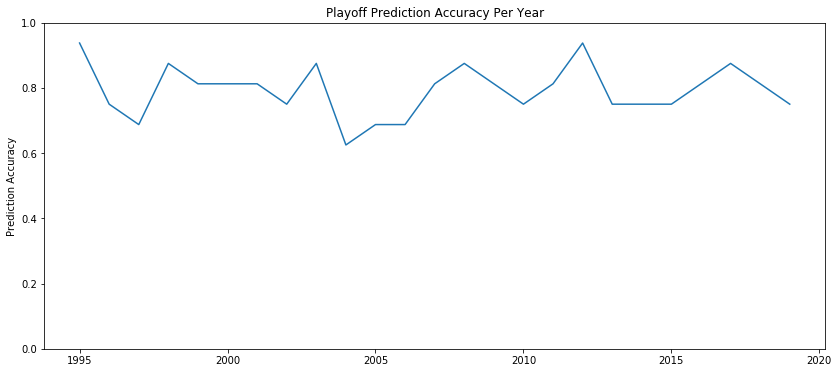

The average error is 0.2075


In [13]:
x = list(range(1995,2020))
y = [1-Error95_5,1-Error96_5,1-Error97_5,1-Error98_5,1-Error99_5,1-Error00_5,1-Error01_5,1-Error02_5,1-Error03_5,1-Error04_5,1-Error05_5,1-Error06_5,1-Error07_5,1-Error08_5,1-Error09_5,1-Error10_5,1-Error11_5,1-Error12_5,1-Error13_5,1-Error14_5,1-Error15_5,1-Error16_5,1-Error17_5,1-Error18_5,1-Error19_5]
fig = plt.figure(figsize = (14,6))
plt.plot(x,y)
plt.ylim(0, 1)
plt.ylabel('Prediction Accuracy')
plt.title('Playoff Prediction Accuracy Per Year')
plt.savefig('ACC_Year.png')


plt.show()
print('The average error is {}'.format(Error_Avg))

In [11]:
np.std(y)

0.07648529270389179